In [4]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

data_path = "../data/historical_ds/"
data = pd.read_csv(data_path + "historical_records_data_with_dates.csv") #"sliding_window_supplier_data_with_target.csv") #"aggregated_supplier_data_with_target.csv") data/historical_ds/historical_records_data_with_dates.csv



In [5]:
data.head()

,supplier_id,record_date,severity_level,category_of_violation,root_cause_category,corrective_actions_suggested,affected_product,process_involved,tone_of_letter,length_of_letter,deadline_for_resolution,resolution_status,follow_up_actions
0,S1,2023-12-19,Moderate,Quality,Process Failure,1,Product A,Packaging,Urgent,188,18,Unresolved,1
1,S1,2023-07-25,Critical,Safety,Process Failure,0,Product C,Shipping,Warning,764,17,Resolved,0
2,S1,2023-08-17,Moderate,Quality,Human Error,1,Product D,Shipping,Warning,297,6,Unresolved,0
3,S1,2024-07-06,Moderate,Regulatory,Equipment Malfunction,0,Product A,Packaging,Urgent,330,27,Resolved,1
4,S1,2023-10-18,Minor,Safety,Human Error,0,Product C,Packaging,Urgent,295,22,Pending,1


In [6]:
data.columns

Index(['supplier_id', 'record_date', 'severity_level', 'category_of_violation',
       'root_cause_category', 'corrective_actions_suggested',
       'affected_product', 'process_involved', 'tone_of_letter',
       'length_of_letter', 'deadline_for_resolution', 'resolution_status',
       'follow_up_actions'],
      dtype='object')

# Trend Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataset is named `data`
# Columns: ['supplier_id', 'record_date', 'severity_level', 'category_of_violation', ...]

# Step 1: Ensure the dataset has a datetime index
data['record_date'] = pd.to_datetime(data['record_date'])  # Convert 'record_date' to datetime
data.set_index('record_date', inplace=True)  # Set 'record_date' as the index

In [24]:
data.head()

,supplier_id,total_warnings,critical_issues,moderate_issues,minor_issues,safety_violations,quality_violations,documentation_violations,regulatory_violations,unresolved_issues,follow_up_actions,avg_length_of_letter,avg_deadline_for_resolution,analysis_start,analysis_end,prediction_start,prediction_end,ncr_or_warning_letter
0,S100,1,1,0,0,0,0,1,0,0,1,934.0,12.0,2023-01-01,2024-01-01,2024-01-01,2024-07-01,0
1,S103,1,0,0,1,1,0,0,0,1,0,272.0,29.0,2023-01-01,2024-01-01,2024-01-01,2024-07-01,0
2,S104,1,0,0,1,0,0,0,1,0,0,735.0,21.0,2023-01-01,2024-01-01,2024-01-01,2024-07-01,0
3,S106,1,1,0,0,0,0,0,1,1,1,604.0,10.0,2023-01-01,2024-01-01,2024-01-01,2024-07-01,1
4,S107,1,0,1,0,0,0,0,1,0,1,537.0,6.0,2023-01-01,2024-01-01,2024-01-01,2024-07-01,0


In [25]:
data.columns

Index(['supplier_id', 'total_warnings', 'critical_issues', 'moderate_issues',
       'minor_issues', 'safety_violations', 'quality_violations',
       'documentation_violations', 'regulatory_violations',
       'unresolved_issues', 'follow_up_actions', 'avg_length_of_letter',
       'avg_deadline_for_resolution', 'analysis_start', 'analysis_end',
       'prediction_start', 'prediction_end', 'ncr_or_warning_letter'],
      dtype='object')

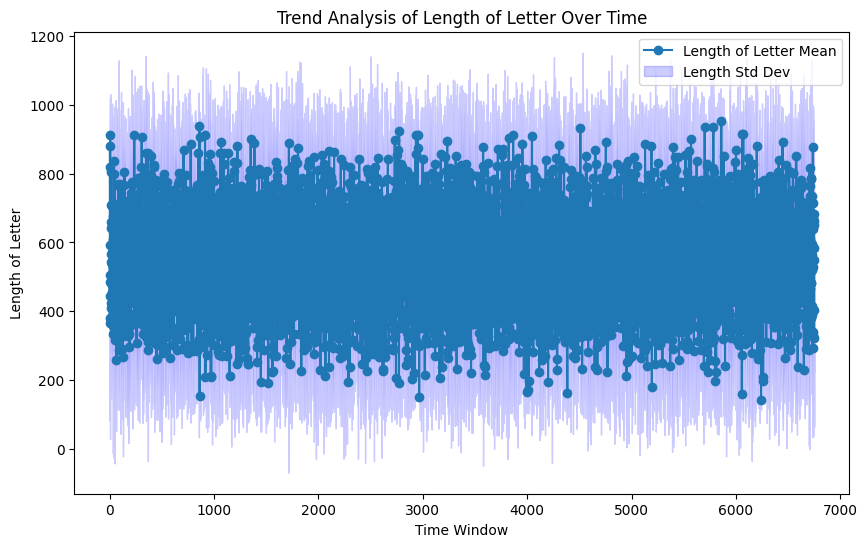

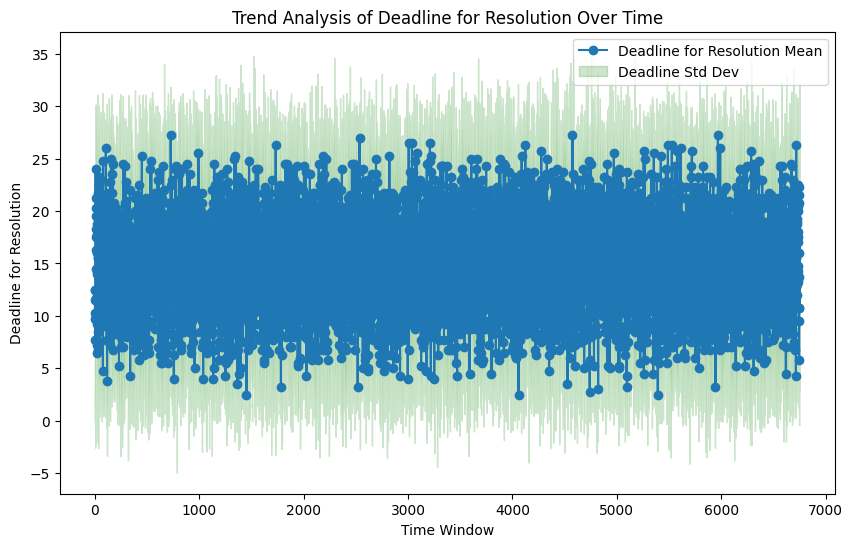

In [7]:


# Step 2: Define overlapping windows
window_size = 7  # 7 days
overlap = 3      # 3 days overlap
step = window_size - overlap

# Create a column to assign each row to a window
data = data.sort_index()  # Ensure data is sorted by date
data['window'] = (np.arange(len(data)) // step)

# Step 3: Aggregate feature values within each window
# Aggregating numerical features: 'length_of_letter' and 'deadline_for_resolution'
aggregated_data = data.groupby('window').agg({
    'length_of_letter': ['mean', 'std'],  # Replace with numerical features
    'deadline_for_resolution': ['mean', 'std']
}).reset_index()

# Rename columns for clarity
aggregated_data.columns = ['window', 'length_mean', 'length_std', 'deadline_mean', 'deadline_std']

# Step 4: Visualize trends for 'length_of_letter'
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['window'], aggregated_data['length_mean'], label='Length of Letter Mean', marker='o')
plt.fill_between(aggregated_data['window'], 
                 aggregated_data['length_mean'] - aggregated_data['length_std'], 
                 aggregated_data['length_mean'] + aggregated_data['length_std'], 
                 color='blue', alpha=0.2, label='Length Std Dev')
plt.xlabel('Time Window')
plt.ylabel('Length of Letter')
plt.title('Trend Analysis of Length of Letter Over Time')
plt.legend()
plt.show()

# Step 5: Visualize trends for 'deadline_for_resolution'
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data['window'], aggregated_data['deadline_mean'], label='Deadline for Resolution Mean', marker='o')
plt.fill_between(aggregated_data['window'], 
                 aggregated_data['deadline_mean'] - aggregated_data['deadline_std'], 
                 aggregated_data['deadline_mean'] + aggregated_data['deadline_std'], 
                 color='green', alpha=0.2, label='Deadline Std Dev')
plt.xlabel('Time Window')
plt.ylabel('Deadline for Resolution')
plt.title('Trend Analysis of Deadline for Resolution Over Time')
plt.legend()
plt.show()


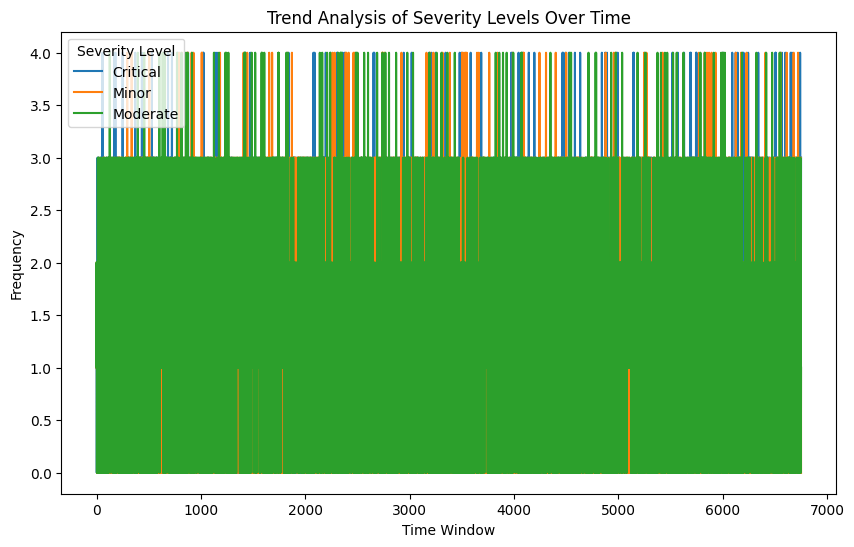

In [8]:
# Calculate frequency of each severity level within each window
severity_trends = data.groupby(['window', 'severity_level']).size().unstack(fill_value=0)

# Plot trends for each severity level
severity_trends.plot(kind='line', figsize=(10, 6))
plt.xlabel('Time Window')
plt.ylabel('Frequency')
plt.title('Trend Analysis of Severity Levels Over Time')
plt.legend(title='Severity Level')
plt.show()


# Sliding Window DS extra features

In [14]:
import joblib
import pandas as pd

#load the training dataset
data_path = "../data/historical_ds/"
sliding_window_data = pd.read_csv(data_path + "sliding_window_supplier_data_with_target.csv") #"aggregated_supplier_data_with_target.csv")



In [15]:
sliding_window_data.columns

Index(['supplier_id', 'total_warnings', 'critical_issues', 'moderate_issues',
       'minor_issues', 'safety_violations', 'quality_violations',
       'documentation_violations', 'regulatory_violations',
       'unresolved_issues', 'follow_up_actions', 'avg_length_of_letter',
       'avg_deadline_for_resolution', 'analysis_start', 'analysis_end',
       'prediction_start', 'prediction_end', 'ncr_or_warning_letter'],
      dtype='object')

## Rate Of Change

In [18]:
import pandas as pd

# Assuming `sliding_window_data` is your sliding window dataset
# Example columns: ['window', 'total_warnings', 'total_violations', ...]

# Step 1: Sort the dataset by window to ensure proper order
#sliding_window_data = sliding_window_data.sort_values(by='window')
# Sort the data by the analysis window start date to maintain temporal order
sliding_window_data = sliding_window_data.sort_values(by="analysis_start")

# Step 2: Calculate the rate of change for warnings and violations
sliding_window_data['warnings_rate_of_change'] = sliding_window_data['total_warnings'].pct_change()
sliding_window_data['violations_rate_of_change'] = sliding_window_data['documentation_violations'].pct_change()

# Step 3: Fill NaN values (e.g., the first row will have NaN for rate of change)
sliding_window_data.fillna(0, inplace=True)

# Step 4: Preview the dataset with the new features
print(sliding_window_data.head())


    supplier_id  total_warnings  critical_issues  moderate_issues  \
0          S100               1                1                0   
20         S147               1                1                0   
19         S144               2                2                0   
185         S53               2                2                0   
1          S103               1                0                0   

     minor_issues  safety_violations  quality_violations  \
0               0                  0                   0   
20              0                  0                   0   
19              0                  1                   0   
185             0                  1                   0   
1               1                  1                   0   

     documentation_violations  regulatory_violations  unresolved_issues  \
0                           1                      0                  0   
20                          1                      0                  1   

In [21]:
sliding_window_data['cumulative_warnings'] = sliding_window_data['total_warnings'].cumsum()
sliding_window_data['cumulative_violations'] = sliding_window_data['documentation_violations'].cumsum()

sliding_window_data['rolling_avg_warnings'] = sliding_window_data['total_warnings'].rolling(window=3).mean()
sliding_window_data['rolling_avg_violations'] = sliding_window_data['documentation_violations'].rolling(window=3).mean()

sliding_window_data['warnings_diff'] = sliding_window_data['total_warnings'].diff()
sliding_window_data['violations_diff'] = sliding_window_data['documentation_violations'].diff()



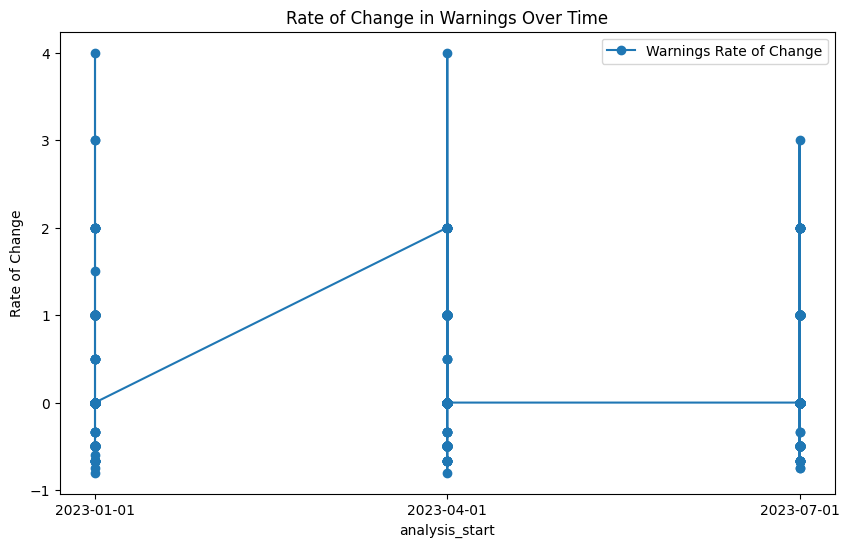

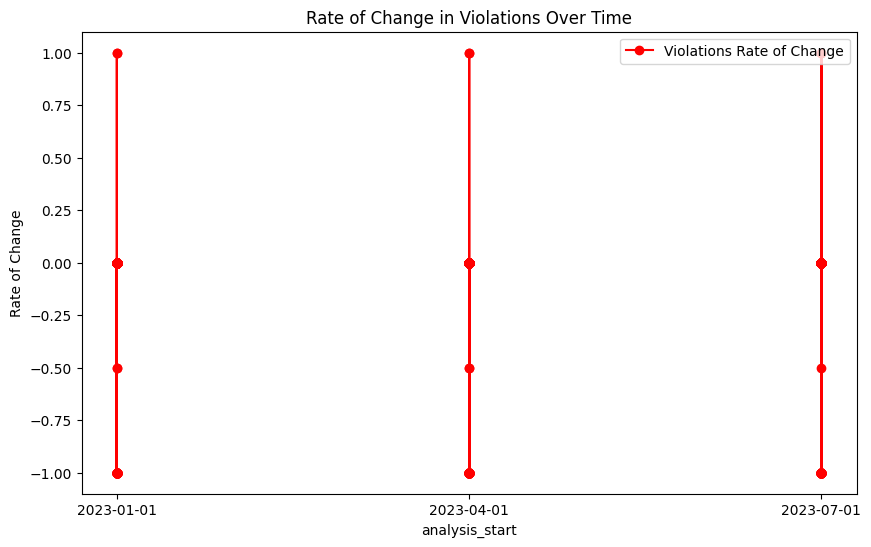

In [23]:
import matplotlib.pyplot as plt

# Plot the rate of change for warnings
plt.figure(figsize=(10, 6))
plt.plot(sliding_window_data['analysis_start'], sliding_window_data['warnings_rate_of_change'], label='Warnings Rate of Change', marker='o')
plt.xlabel('analysis_start')
plt.ylabel('Rate of Change')
plt.title('Rate of Change in Warnings Over Time')
plt.legend()
plt.show()

# Plot the rate of change for violations
plt.figure(figsize=(10, 6))
plt.plot(sliding_window_data['analysis_start'], sliding_window_data['violations_rate_of_change'], label='Violations Rate of Change', marker='o', color='red')
plt.xlabel('analysis_start')
plt.ylabel('Rate of Change')
plt.title('Rate of Change in Violations Over Time')
plt.legend()
plt.show()
